In [ ]:
import matplotlib.pyplot as plt
from numpy.random import normal
import numpy as np
import pandas as pd
!pip install filterpy

     |████████████████████████████████| 177 kB 23.8 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=6e84b8bd1f1b328165977e877512c0baa019b4f378c3f7dfa45ca9f57a5d93c2
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy


In [ ]:

data =  pd.read_csv("FinalData.csv")

In [ ]:
from filterpy.kalman import JulierSigmaPoints

sigmas = JulierSigmaPoints(n=5, kappa=1)

def fx(xin, dt):
    ar = np.exp(0.1/xin[4])
    # Gs = xin[0]
    # R_a = Xin[2]
    # p1 = xin[1]
    # tau = xin[4]
    xin[0] = xin[0] - (10 * xin[1] * xin[0]) + (10 * xin[2]) 
    xin[2] =  (2 * (xin[2])/ar) - (xin[3]/ ar**2) 
    xin[4] = xin[4] + 10 
    xin[1] = xin[1] + 10 
      
    return xin

def hx(xin):
    return xin[:1] 

In [ ]:
from numpy.random import randn
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.common import Q_discrete_white_noise

ukf = UnscentedKalmanFilter(dim_x=5, dim_z=1, dt=100., hx=hx, fx=fx, points=sigmas)
ukf.P *= 1000
ukf.R *= 10e8
ukf.Q = np.array([[10e-6,0,0,0,0],[0,10e-3,0,0,0],[0,0,10e-3,0,0],[0,0,0,10e-2,0],[0,0,0,0,10e-1]])
ukf.x = [118, 0.068,0,0,20]

yss, xss = [], []
for i in range(len(data)):
    z = data.iloc[i,1].astype(int)
    ukf.predict()
    ukf.update(z)
    yss.append(z)
    xss.append(ukf.x[0])
    



In [ ]:
error = 0
for i in range(len(yss)):
    diff = yss[i] - xss[i]
    error += diff**2
error = error/len(yss)

In [ ]:
print(error)

0.07472101816971238


In [ ]:
accuracy = 100 - error

In [ ]:
print(accuracy)

99.92527898183029


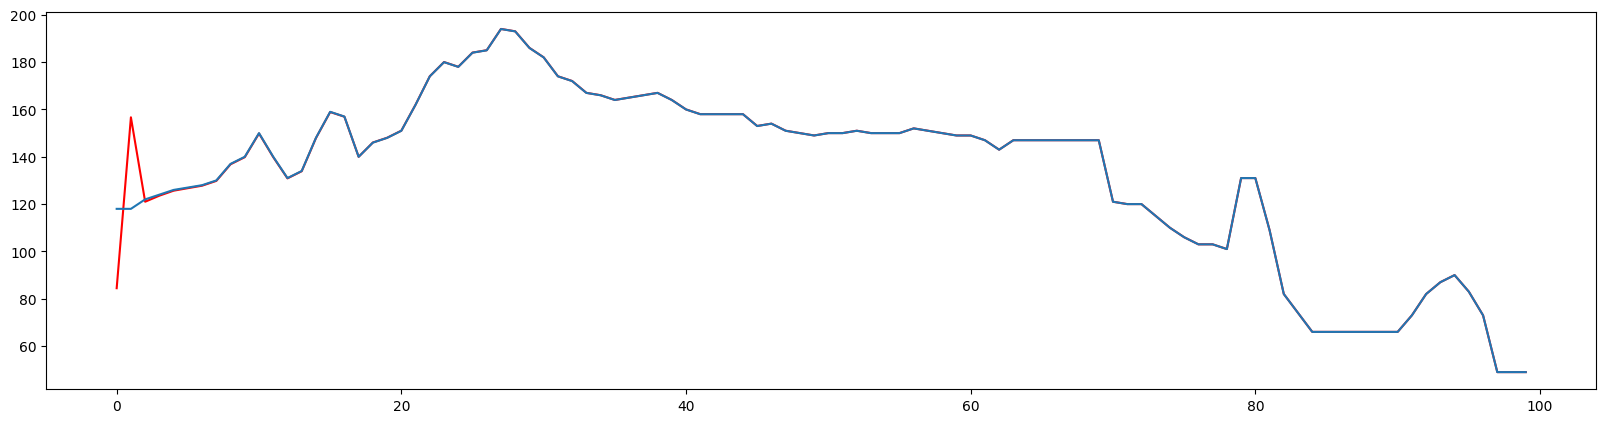

In [ ]:
plt.figure(num=None, figsize=(20, 5), dpi=100)
plt.plot(xss[0:100],color='red')
plt.plot(yss[0:100]);